In [2]:
import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString


os.chdir('/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/Data')
gdf0 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb"))
gdf1 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Crude_Oil_Produced_Water_Transfer_Flowlines_Approved_CONFIDENTIAL.gdb"))
flowlines = pd.read_excel('FlowlineSpreadsheet_Mines.xlsx')
spills = pd.read_excel('Flowline-Related Spills (2022).xlsx')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1036c7700>>
Traceback (most recent call last):
  File "/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Combine both gbd files

In [ ]:
# Check if the CRS of gdf0 is different from that of gdf1
if gdf0.crs != gdf1.crs:
    # If true, convert the CRS of gdf1 to match that of gdf0, modifying gdf1 in place
    gdf1.to_crs(gdf.crs, inplace=True)

# Concatenate gdf0 and gdf1 into a single GeoDataFrame, ignoring the original indices to create a new continuous index
gdf = pd.concat([gdf0,gdf1],ignore_index=True)
gdf.head(1)

,Operator,Fluid,Material,Diam_in,Status,Length_ft,Doc_Num,SHAPE_Length,geometry
0,EVERGREEN NATURAL RESOURCES LLC,Gas,polly,4.0,Active,2277.71,403322934,693.972162,"MULTILINESTRING ((524642.670 4117088.796, 5246..."


Transform excel files into gbd files

<Axes: >

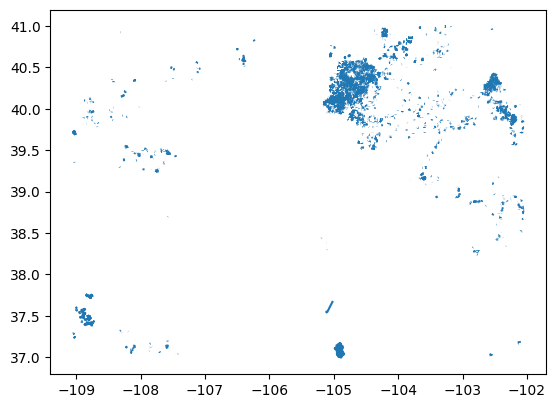

In [ ]:
# Check if the 'geometry' column does not exist in the flowlines DataFrame and initialize it as an empty string if true
if 'geometry' not in flowlines.columns:
    flowlines['geometry'] = ''

# Iterate over each row in the flowlines DataFrame
for index, row in flowlines.iterrows():
    # Create a LineString geometry from the start and end coordinates of each flowline
    geom = LineString([(row['STARTLONG'],row['STARTLAT']),(row['ENDLONG'],row['ENDLAT'])])
    # Assign the created LineString geometry to the 'geometry' column at the current index
    flowlines.at[index,'geometry'] = geom

# Convert the flowlines DataFrame into a GeoDataFrame, explicitly setting the 'geometry' column and the Coordinate Reference System (CRS) to 'EPSG:4326' (WGS 84)
fl_gdf = gpd.GeoDataFrame(flowlines, geometry='geometry', crs='EPSG:4326')
fl_gdf.plot()

In [ ]:
# Check if the CRS of fl_gdf is different from that of gdf
if fl_gdf.crs != gdf.crs:
    # If true, convert the CRS of fl_gdf to match that of gdf, modifying fl_gdf in place
    fl_gdf.to_crs(gdf.crs, inplace=True)
    print('Change fl crs to gdf crs')

Change fl crs to gdf crs


In [ ]:
fl_gdf.plot()

<Axes: >

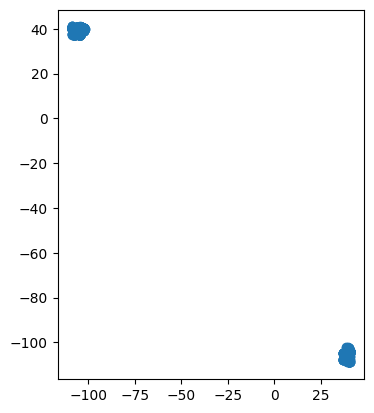

In [ ]:
# Set pandas display options to ensure that all DataFrame columns are displayed, regardless of the number of columns
pd.options.display.max_columns = None

# Convert 'spills' DataFrame to GeoDataFrame 'spl_gdf' with Point geometries from 'Long' and 'Lat', setting CRS to 'EPSG:4326'.
spl_gdf = gpd.GeoDataFrame(spills, geometry=gpd.points_from_xy(spills.Long,spills.Lat), crs='EPSG:4326')
spl_gdf.head(2)
spl_gdf.plot()

In [ ]:
# Check if the CRS of fl_gdf is different from that of gdf
if spl_gdf.crs != gdf.crs:
    # If true, convert the CRS of fl_gdf to match that of gdf, modifying fl_gdf in place
    spl_gdf.to_crs(gdf.crs, inplace=True)
    print('Change spl crs to gdf crs')

Change spl crs to gdf crs


<Axes: >

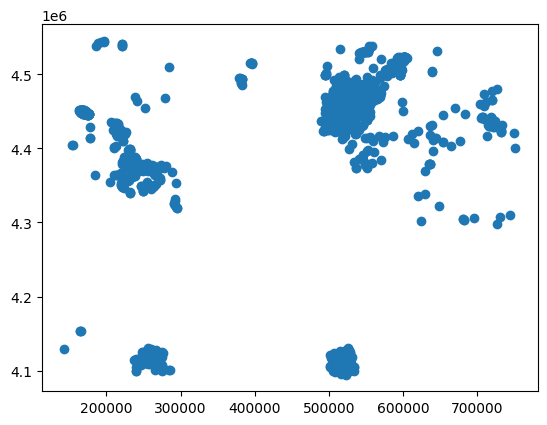

In [ ]:
spl_gdf.plot()

Download all new gbd files

In [1]:
spl_gdf.to_file('spills.geojson', driver='GeoJSON')

NameError: name 'spl_gdf' is not defined

In [14]:
# Define the path to your output File Geodatabase (ensure the directory exists)
output_gdb_path = "/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/Data/flowlines.gdb"

# Export the GeoDataFrame to the File Geodatabase
fl_gdf.to_file(driver='FileGDB', filename=output_gdb_path)

DriverError: unsupported driver: 'FileGDB'